In [7]:
import pandas as pd
import sys
sys.path.append("..")
from src.unsupervised_model import train_isolation_forest, save_model, evaluate_isolation_forest

In [24]:
df = pd.read_csv("/Users/emiliamacarenarodriguezlavarriosarriaga/Desktop/AIFO/VisionAI/data/processed/clean_creditcard.csv")


In [26]:
X = df.drop("Class", axis=1)
y = df["Class"]


In [27]:
iso = train_isolation_forest(X)


In [28]:
evaluate_isolation_forest(iso, X, y)


              precision    recall  f1-score   support

           0       0.96      1.00      0.98    284315
           1       1.00      0.03      0.05     10734

    accuracy                           0.96    295049
   macro avg       0.98      0.51      0.52    295049
weighted avg       0.97      0.96      0.95    295049



array([0, 0, 0, ..., 0, 0, 0], shape=(295049,))

In [31]:
save_model(iso)
print("Model training complete and saved.")

Model training complete and saved.


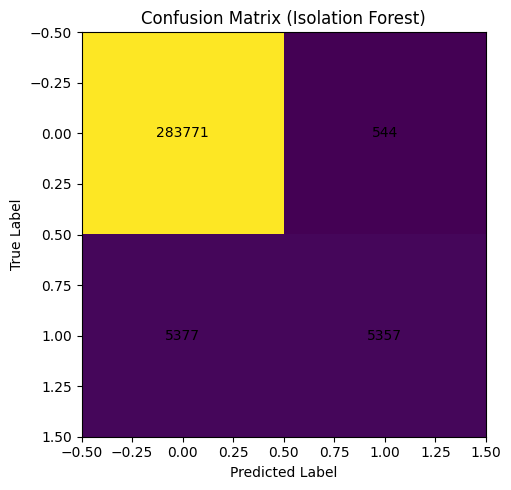

In [30]:
#Confusion Matrix 
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/Users/emiliamacarenarodriguezlavarriosarriaga/Desktop/AIFO/VisionAI/data/processed/clean_creditcard.csv")

# Prepare features and label
X = df.drop("Class", axis=1)
y = df["Class"]

# Train Isolation Forest
iso = IsolationForest(
    n_estimators=50,
    contamination=0.02,
    random_state=42
)
iso.fit(X)

# Predictions (-1 = anomaly → 1 fraud, 1 = normal → 0)
y_pred = iso.predict(X)
y_pred = (y_pred == -1).astype(int)

# Confusion matrix
cm = confusion_matrix(y, y_pred)

# Plot confusion matrix (matplotlib only, no custom colors)
plt.figure(figsize=(6, 5))
plt.imshow(cm)
plt.title("Confusion Matrix (Isolation Forest)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Add the values inside the matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.tight_layout()
plt.show()
